<a href="https://colab.research.google.com/github/bagasdal/bagasdal/blob/main/NLP_Corona_Sentiment_Tweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NLP Corona Sentiment tweet**


bagas daliyanto

In this program, an NLP will be created that can find out the sentiment of tweets about corona. in this case the tweet will be categorized into 3 categories: Negative, Neutral, and Positive

In [ ]:
import pandas as pd
# Data set yang saya gunakan sudah memiliki
df = pd.read_csv('Corona_NLP_test.csv', engine='python')
# Melakukan cek nilai pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
df_train = pd.read_csv('Corona_NLP_train.csv', engine='python')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Drop unused data
df_train = df_train.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])
# check the result after column drop
df_train

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know its getting tough when @KameronWilds...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
# drop unused data on head
df = df.drop(columns=['UserName', 'ScreenName', 'Location', 'TweetAt'])
# check the result after dropped
df.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
# combine 2 data frame
df_gabungan = pd.concat([df, df_train], ignore_index=True)

# Check data with value null
df_gabungan.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
df_gabungan.shape

(44955, 2)

In [ ]:
df_gabungan.tail()

,OriginalTweet,Sentiment
44950,Airline pilots offering to stock supermarket s...,Neutral
44951,Response to complaint not provided citing COVI...,Extremely Negative
44952,You know its getting tough when @KameronWilds...,Positive
44953,Is it wrong that the smell of hand sanitizer i...,Neutral
44954,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
df_gabungan.loc[(df_gabungan.Sentiment == 'Extremely Negative'),'Sentiment']='Negative'
df_gabungan.loc[(df_gabungan.Sentiment == 'Extremely Positive'),'Sentiment']='Positive'
# index_names = df[ df['Sentiment'] == 'Neutral' ].index
# df.drop(index_names, inplace = True)
df_gabungan.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


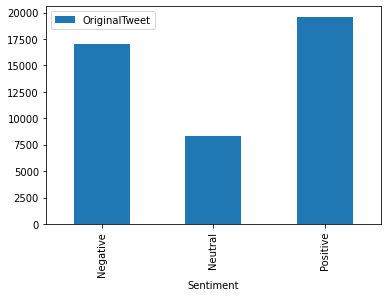

In [ ]:
import matplotlib.pyplot as plt

# display data distribution
df_gabungan.groupby('Sentiment').count().plot(kind='bar')

In [ ]:
# Preprocessing Dataframe to get better result
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

def tweet_to_words(tweet):
    
    text = tweet.lower()
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    words = text.split()
    words = [w for w in words if w not in stopwords.words("english")]
    words = [PorterStemmer().stem(w) for w in words]
    return words

print("\nOriginal tweet ->", df_gabungan['OriginalTweet'][0])
print("\nProcessed tweet ->", tweet_to_words(df_gabungan['OriginalTweet'][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Original tweet -> TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1

Processed tweet -> ['trend', 'new', 'yorker', 'encount', 'empti', 'supermarket', 'shelv', 'pictur', 'wegman', 'brooklyn', 'sold', 'onlin', 'grocer', 'foodkick', 'maxdeliveri', 'coronaviru', 'fear', 'shopper', 'stock', 'http', 'co', 'gr76pcrlwh', 'http', 'co', 'ivmkmsqdt1']


In [ ]:
X = list(map(tweet_to_words, df_gabungan['OriginalTweet']))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode the label
le = LabelEncoder()
Y = le.fit_transform(df_gabungan['Sentiment'])

In [ ]:
print(X[0])
print(Y[0])

['trend', 'new', 'yorker', 'encount', 'empti', 'supermarket', 'shelv', 'pictur', 'wegman', 'brooklyn', 'sold', 'onlin', 'grocer', 'foodkick', 'maxdeliveri', 'coronaviru', 'fear', 'shopper', 'stock', 'http', 'co', 'gr76pcrlwh', 'http', 'co', 'ivmkmsqdt1']
0


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

y = pd.get_dummies(df_gabungan['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

count_vector = CountVectorizer(max_features=vocabulary_size,
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 

# Fit training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
print(count_vector.get_feature_names()[0:200])

['0', '00', '000', '00pm', '03', '06', '07', '08', '09', '1', '10', '100', '1000', '100k', '10am', '10downingstreet', '10pm', '10th', '11', '111', '11am', '12', '125', '12pm', '13', '130', '14', '15', '150', '16', '17', '17th', '18', '19', '19australia', '19sa', '19th', '19uk', '1m', '1st', '2', '20', '200', '2000', '2002', '2003', '2008', '2016', '2018', '2019', '2019cov', '202', '2020', '2021', '21', '219', '21daylockdown', '21dayslockdown', '22', '224', '23', '24', '25', '250', '25th', '26', '27', '28', '29', '2m', '2nd', '2pli', '2x', '3', '30', '300', '3000', '30am', '30pm', '31', '3121', '32', '33', '34', '35', '35k', '36', '360', '37', '39', '3d', '3dprint', '3m', '3pli', '3rd', '3x', '4', '40', '400', '4000', '41', '42', '43', '44', '45', '46', '47', '48', '49', '4pm', '4th', '5', '50', '500', '5000', '500ml', '52', '53', '54', '55', '56', '57', '58', '5am', '5g', '5k', '5m', '5pm', '5th', '6', '60', '600', '62', '64', '65', '66', '67', '6am', '6ft', '6th', '7', '70', '700', '7

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

# tokenize and sequence to data frame
def tokenize_pad_sequences(text):

    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len)
    return X, tokenizer

print('Before Tokenization & Padding \n', df_gabungan['OriginalTweet'][0])
X, tokenizer = tokenize_pad_sequences(df_gabungan['OriginalTweet'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1
After Tokenization & Padding 
 [2312   99  207   25  122 3826   10 3595  599   46   55 1943   31   11
  362   71   44    7    4    6    7    4    6    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
# prepare data for validation and testing
y = pd.get_dummies(df_gabungan['Sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (26973, 50) (26973, 3)
Validation Set -> (8991, 50) (8991, 3)
Test Set -> (8991, 50) (8991, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nAkurasi test telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy'])

# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, 
                      callbacks = [callbacks], verbose=1)

Epoch 1/50
422/422 [==============================] - 74s 51ms/step - loss: 1.0072 - accuracy: 0.4344 - val_loss: 0.9860 - val_accuracy: 0.4723
Epoch 2/50
422/422 [==============================] - 20s 48ms/step - loss: 0.9852 - accuracy: 0.4540 - val_loss: 0.9575 - val_accuracy: 0.4895
Epoch 3/50
422/422 [==============================] - 20s 48ms/step - loss: 0.9441 - accuracy: 0.4891 - val_loss: 0.9618 - val_accuracy: 0.4958
Epoch 4/50
422/422 [==============================] - 21s 49ms/step - loss: 0.8763 - accuracy: 0.5597 - val_loss: 0.8164 - val_accuracy: 0.6284
Epoch 5/50
422/422 [==============================] - 18s 44ms/step - loss: 0.7921 - accuracy: 0.6428 - val_loss: 0.7547 - val_accuracy: 0.6701
Epoch 6/50
422/422 [==============================] - 18s 43ms/step - loss: 0.7228 - accuracy: 0.6945 - val_loss: 0.7536 - val_accuracy: 0.6854
Epoch 7/50
422/422 [==============================] - 17s 40ms/step - loss: 0.6418 - accuracy: 0.7469 - val_loss: 0.6693 - val_accuracy:

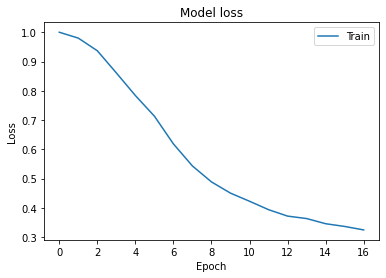

In [ ]:
# Plotting Model Loss dan Accuracy

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

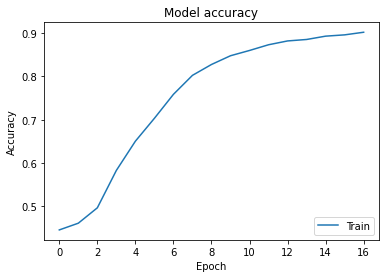

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()